# Module 3

### 3.1 Linear regression Model on gold.csv

In [78]:
#basic import
import pandas as pd
import numpy as np
#modeling with linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#read gold.csv file and data cleaning is done and date is set as index
gold=pd.read_csv('C:/Users/sakshi/Desktop/ai/Gold/Gold.csv', parse_dates=['Date'] )
gold.set_index(gold.Date,inplace=True)
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2017-05-04,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
2019-04-26,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [80]:
#splitting data into train and test sets
i=0
while((gold['Pred'][i]>0) or (gold['Pred'][i]<0)):
    i+=1
print(i)

411


In [81]:
train=gold.iloc[:411]
train

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2017-05-04,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
2018-12-04,2018-12-04,30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
2018-12-05,2018-12-05,30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
2018-12-06,2018-12-06,31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


In [82]:
test=gold.iloc[411:]
test

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2018-12-11,2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
...,...,...,...,...,...,...,...,...,...
2019-04-26,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


**Linear function**

In [83]:
#for simplicity
regressor = LinearRegression()

In [84]:
#model fitting x has eleents on which value of y can be dependent
x = train[['Price','Open', 'High', 'Low']].values

y = train.Pred.values

regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#coefficient of regression and intercept values are found
print('coeff. =>',regressor.coef_)
print('intercept =>',regressor.intercept_)

coeff. => [ 2.  3. -1. -4.]
intercept => -2.6716406864579767e-12


In [86]:
#using the values found by fitting the model 
gold_coef= pd.DataFrame(regressor.coef_, ['Price','Open', 'High', 'Low'], columns =['Coefficient'])
gold_coef

,Coefficient
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [87]:
#finally predicting pred values for the test data with help of model genrated
gold_pred= regressor.predict(test[['Price','Open', 'High', 'Low']].values)
gold_pred

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [88]:
test['Pred']=gold_pred

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
#NaN values in test dataframe is replaced by the calculated ones
test

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2018-12-11,2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
2018-12-12,2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
2018-12-13,2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
2018-12-14,2018-12-14,31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
2018-12-17,2018-12-17,31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976
...,...,...,...,...,...,...,...,...,...
2019-04-26,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
2019-04-30,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
2019-05-01,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305


**Polynomial function**

In [90]:
#simplicity
regressor_poly = LinearRegression()

In [91]:
#to find the new values of test data we use the model again
y_new = train.new.values
X = train[['Price','Open', 'High', 'Low']].values

In [92]:
regressor_poly.fit(X, y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#coefficient
regressor_poly.coef_

array([ 1.01202641, -1.00094252,  1.00492221, -1.01604305])

In [94]:
#for new column values
coeff_new = pd.DataFrame(regressor_poly.coef_, ['Price','Open', 'High', 'Low'], columns =['New_Coefficient'])
coeff_new

,New_Coefficient
Price,1.012026
Open,-1.000943
High,1.004922
Low,-1.016043


In [95]:
#predicted new values to check if they are same as before if same then our model is accurate
predict_new = regressor_poly.predict(test[['Price','Open', 'High', 'Low']].values)
predict_new

array([ 195.87175996,   43.81045001,  127.64555171,  126.84850335,
        373.25587121,   96.52669447,  508.14298334,  531.85677824,
        228.27918263,  294.96998744,  276.54889134,  334.86633482,
         96.8648385 ,  338.40650334,  252.48129707, 1402.5726739 ,
        148.72018135,  225.13406706,  410.34039577,  307.46344053,
        689.68423835,   51.96116912,  193.89164564,  312.66604071,
        312.88849686,  321.55222829,  126.09973931,   47.0605739 ,
        186.16758365,  366.17351653,  169.14276939,   76.64757043,
        634.12609327,  341.34757168,  763.03648274,  171.46522044,
        507.58841282,  794.83204407,  328.17978871,  132.32042258,
        226.09963806,  136.84901992,  359.21040512,  143.11366027,
         55.8069992 ,  532.99877952,  345.1036687 ,  562.24132419,
        281.85865627,  621.1101586 ,  115.86474836,   65.58986727,
        291.70207135,   41.98704654,  248.02039852,  199.41784372,
         96.46062112,  724.25808887,  399.20790108,   24.51708

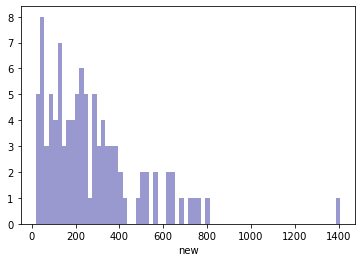

In [96]:
#new values already provided
sns.distplot(test['new'],kde=False, hist =True, color ='darkblue', bins = 70, label ='Present New')

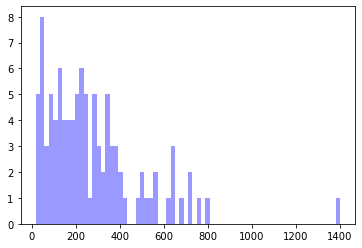

In [97]:
#calculated new values
sns.distplot(predict_new, kde=False,hist =True, color ='blue', bins = 70, label ='Present New')

In [98]:
#create a df to compare them
df_bar = pd.DataFrame({'Present-New': gold['new'][411:], 'Predict-New': predict_new.flatten()})
df_bar.head()

,Present-New,Predict-New
Date,,
2018-12-11,195.423493,195.871760
2018-12-12,44.232664,43.810450
2018-12-13,127.646233,127.645552
2018-12-14,127.219539,126.848503
2018-12-17,372.603976,373.255871


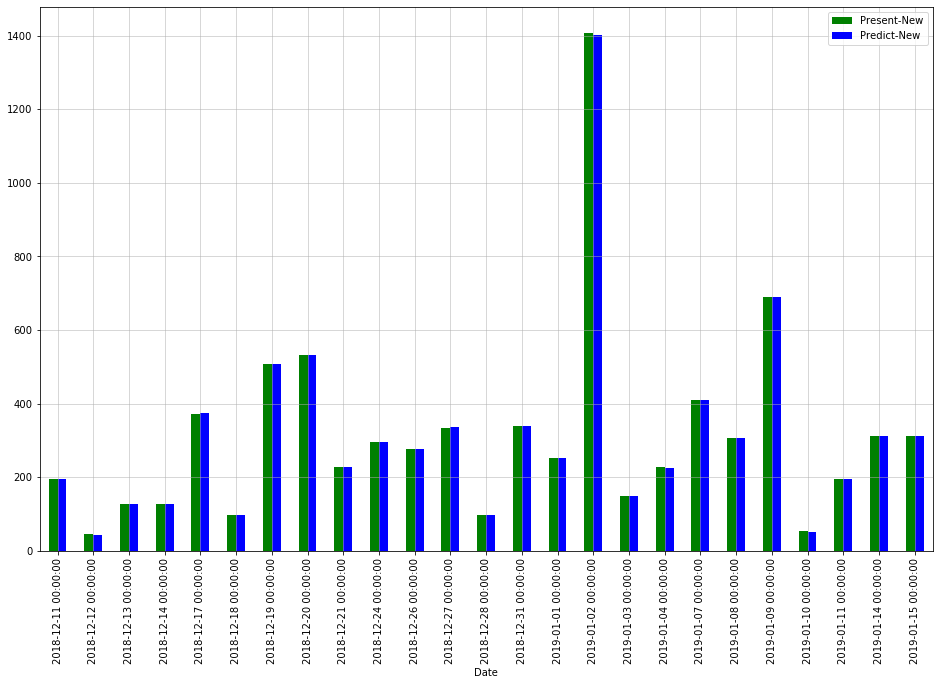

In [99]:
#plot histogram to check on the model
df_bar = df_bar.head(25)
df_bar.plot(kind ='bar', figsize =(16,10), color=['green','blue'])
plt.grid(which ='major', linestyle ='-', linewidth = '0.5')
plt.show()

**As the value of new columns are same this shows Model is accurate**

### 3.2 CAPM analysis and Beta Calculation using Regression

In [100]:
#stock of Infosys and niftyindex
infy=pd.read_csv('C:/Users/sakshi/Desktop/ai/week3.csv')
infy.index = infy['Date'].astype('datetime64')
nifty=pd.read_csv('C:/Users/sakshi/Desktop/ai/Nifty50/Nifty50/Nifty50.csv')
nifty.index = nifty['Date'].astype('datetime64')

In [101]:
import statsmodels.api as sm


In [102]:
#past 3 months close price
daily_prices = pd.concat([nifty['Close']['2019-02-13':].pct_change(1), infy['Close Price']['2019-02-13':].pct_change(1)], axis = 1)
daily_prices.columns = ['NIFTY', 'INFY']
daily_prices.dropna(axis=0,inplace=True)

In [103]:
#OLS model
x=daily_prices['NIFTY']
y=daily_prices['INFY']
x1 = sm.add_constant(x)
x1['NIFTY'][0]=0
x1

c:\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,NIFTY
Date,,
2019-02-14,1.0,0.000000
2019-02-15,1.0,-0.002015
2019-02-18,1.0,-0.007781
2019-02-19,1.0,-0.003440
2019-02-20,1.0,0.012363
2019-02-21,1.0,0.005067
2019-02-22,1.0,0.000167
2019-02-25,1.0,0.008196
2019-02-26,1.0,-0.004118


In [104]:
model = sm.OLS(y, x1)
results = model.fit()
results

In [105]:
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.048     
Dependent Variable: INFY             AIC:                -338.2171 
Date:               2020-05-17 18:12 BIC:                -334.1310 
No. Observations:   57               Log-Likelihood:     171.11    
Df Model:           1                F-statistic:        3.832     
Df Residuals:       55               Prob (F-statistic): 0.0554    
R-squared:          0.065            Scale:              0.00014984
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const    -0.0011      0.0016    -0.6572    0.5138    -0.0043    0.0022
NIFTY     0.4650      0.2376     1.9576    0.0554    -0.0110    0.9411
-------------------------------------------------------------------
Omnibus:               0.880         Durbin-Watson:

In [106]:
print('Beta',results.params[1])

Beta 0.46502172434966904


In [107]:
#MONTHLY 
prices = pd.concat([nifty['Close'], infy['Close Price']], axis = 1)
prices.columns = ['NIFTY', 'INFY']
monthly=prices.groupby([prices.index.to_period('M')]).sum()
month=monthly.pct_change()
month.dropna(axis=0,inplace=True)
month

,NIFTY,INFY
Date,,
2017-06,0.633819,0.583443
2017-07,0.025311,0.026222
2017-08,0.005184,-0.022323
2017-09,0.007750,-0.055891
2017-10,-0.032275,-0.017377
2017-11,0.120189,0.141330
2017-12,-0.091129,-0.045285
2018-01,0.147837,0.198885
2018-02,-0.155451,-0.112087


In [108]:
#OLS model
x=month['NIFTY']
y=month['INFY']
x1 = sm.add_constant(x)
x1['NIFTY'][0]=0
x1

,const,NIFTY
Date,,
2017-06,1.0,0.000000
2017-07,1.0,0.025311
2017-08,1.0,0.005184
2017-09,1.0,0.007750
2017-10,1.0,-0.032275
2017-11,1.0,0.120189
2017-12,1.0,-0.091129
2018-01,1.0,0.147837
2018-02,1.0,-0.155451


In [109]:
model = sm.OLS(y, x1)
results = model.fit()
results

In [110]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.544   
Dependent Variable: INFY             AIC:                -20.7508
Date:               2020-05-17 18:12 BIC:                -18.3947
No. Observations:   24               Log-Likelihood:     12.375  
Df Model:           1                F-statistic:        28.41   
Df Residuals:       22               Prob (F-statistic): 2.38e-05
R-squared:          0.564            Scale:              0.022774
--------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
--------------------------------------------------------------------
const    0.0172      0.0310    0.5545    0.5848    -0.0471    0.0815
NIFTY    1.1273      0.2115    5.3297    0.0000     0.6887    1.5660
-----------------------------------------------------------------
Omnibus:              27.879       Durbin-Watson:          1.265 
Prob(Omnibus

In [111]:
print('Beta',results.params[1])

Beta 1.1273237612832634


# Results
## Beta Values:
**Daily**: *0.46502172434966904*  
**Monthly**: *1.1273237612832634*

A beta greater than 1.0 suggests that the stock is more volatile than the broader market, and a beta less than 1.0 indicates a stock with lower volatility.